# Case study

This notebook reproduces the analysis of Section 4.2.5.

### Setup
Follow the instructions `README.md` to download and setup the data files.

In [1]:
%matplotlib inline
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
def load_result(file_path):
    with open(file_path) as f:
        return json.load(f)

In [3]:
get_qm = lambda r, qm='matthews_corr': r['al_history']['mvhistory'][qm]['values']

## Load files

Load summary result file.

In [4]:
data_path = '../data/output/evaluation_part2/Sf-Pn-3f-2000n-5p/results/'

In [5]:
df = pd.read_csv('../data/output/evaluation_part2/evaluation_part2.csv')
df = df.query('id in [7729919105981329866, 158409497023521930]').reset_index(drop=True)
df

,id,file_name,data_set,split_strategy,initial_pool_strategy,initial_pool_resample_version,model,init_strategy,qs,num_points,...,pauc_maximum,pauc_ramp_up,pauc_quality_range,pauc_total_quality_range,pauc_average_end_quality,pauc_average_quality_change,pauc_average_gain,pauc_average_loss,pauc_learning_stability,pauc_ratio_of_outlier_queries
0,158409497023521930,/home/cornelia/data/input/processed/Stamps/Sta...,Stamps,Sf,Pn,4.0,SVDDneg,Thumb_Tax,DecisionBoundaryQs,325.0,...,0.935897,0.007157,0.108601,0.249461,0.935897,0.001086,0.049495,-0.031394,0.900532,0.13
1,7729919105981329866,/home/cornelia/data/input/processed/Stamps/Sta...,Stamps,Sf,Pn,4.0,SVDDneg,Thumb_Tax,NeighborhoodBasedQs,325.0,...,0.967949,-0.211912,0.140652,0.352564,0.967949,0.001407,0.043092,-0.061795,2.754546,0.14


Load raw result `.json` files for the selected experiments.

In [6]:
f1 = data_path + '/'.join(df.iloc[0, 1].split('/')[-2:]).replace('.csv', '') + '_' + str(df.iloc[0, 8]) + '_SVDDneg_' + str(df.iloc[0, 0]) + '.json'
f2 = data_path + '/'.join(df.iloc[1, 1].split('/')[-2:]).replace('.csv', '') + '_' + str(df.iloc[1, 8]) + '_SVDDneg_' + str(df.iloc[1, 0]) + '.json'

In [7]:
v1 = get_qm(load_result(f1))
v2 = get_qm(load_result(f2))

## Analysis

In [8]:
data = pd.DataFrame(np.c_[v1, v2], columns=['τ_DB', 'τ_NB'])

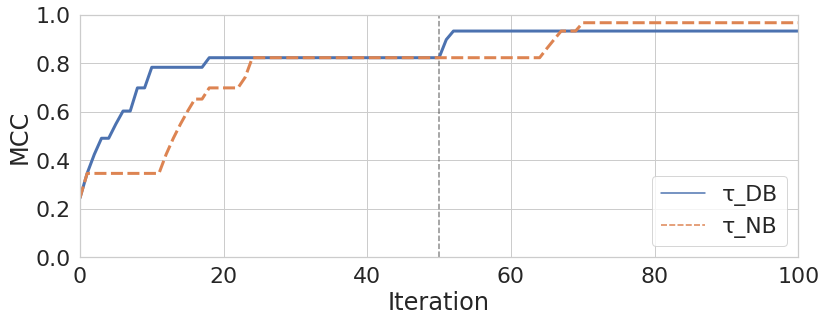

In [9]:
font_scale=2.0
sns.set_context("notebook", font_scale=font_scale)
fig, ax = plt.subplots()
_ = fig.set_size_inches((12, 5))
ax.axvline(x=50, color='k', linestyle='--', alpha=0.5)
sns.lineplot(data=data, linewidth=3, ax=ax)
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
ax.set_xlabel("Iteration")
ax.set_ylabel("MCC")
plt.legend(loc='lower right')
fig.tight_layout()
fig.savefig('../plots/eval_p2_progress_curve_example.pdf')

Show the summary of the active-learning curves.

In [10]:
df[['m_start_quality', 'm_end_quality', 'm_maximum', 'm_ramp_up', 'm_quality_range', 'm_total_quality_range',
       'm_average_end_quality', 'm_average_quality_change', 'm_average_gain',
       'm_average_loss', 'm_learning_stability', 'm_ratio_of_outlier_queries']].round(2)

,m_start_quality,m_end_quality,m_maximum,m_ramp_up,m_quality_range,m_total_quality_range,m_average_end_quality,m_average_quality_change,m_average_gain,m_average_loss,m_learning_stability,m_ratio_of_outlier_queries
0,0.24,0.93,0.93,0.31,0.69,0.69,0.93,0.01,0.07,0.0,0.37,0.13
1,0.24,0.97,0.97,0.10,0.72,0.72,0.97,0.01,0.06,0.0,0.94,0.14


Inspect the step-wise learning stability.

In [11]:
k = 10
end = 100

In [12]:
v1 = np.array(v1)
v2 = np.array(v2)

In [13]:
diff1 = v1[k:end + 1] - v1[:end-k+1]
diff2 = v2[k:end + 1] - v2[:end-k+1]
qr_tot1 = v1[k:end + 1] - v1[0]
qr_tot2 = v2[k:end + 1] - v2[0]
ls1 = [diff1[i] / k / (qr_tot1[i] / (i + k)) if qr_tot1[i] != 0 else 0.0 for i in range(end - k + 1)]
ls2 = [diff2[i] / k / (qr_tot2[i] / (i + k)) if qr_tot2[i] != 0 else 0.0 for i in range(end - k + 1)]

In [14]:
data = pd.DataFrame(np.c_[ls1, ls2], columns=['τ_DB', 'τ_NB'])
data.index += k

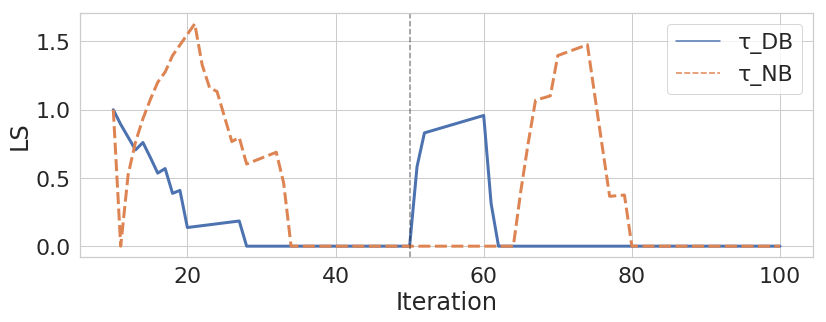

In [15]:
font_scale=2.0
sns.set_context("notebook", font_scale=font_scale)
fig, ax = plt.subplots()
_ = fig.set_size_inches((12, 5))
sns.lineplot(data=data, linewidth=3, ax=ax)
ax.axvline(x=50, color='k', linestyle='--', alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("LS")
fig.tight_layout()